In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, confusion_matrix, average_precision_score
warnings.filterwarnings('ignore')

In [2]:
methods = [
    ('KNN', KNeighborsClassifier(n_neighbors=  3)),
    ('Random Forest', RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )),
    ('MLP', MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
    )),
    ('SVM', SVC(
        kernel = 'rbf',
        C = 1,
        gamma = 'scale',
        class_weight='balanced',
        probability=True
        ))
]

In [3]:
methods2 = [
    ('Origin', 'Data/d2/Balanced Data/origin.csv'),
    ('SMOTE', 'Data/d2/Balanced Data/SMOTE.csv'),
    ('SMOTE NC', 'Data/d2/Balanced Data/SMOTENC.csv'),
    ('ADASYN', 'Data/d2/Balanced Data/ADASYN.csv'),
    ('Near Miss', 'Data/d2/Balanced Data/NearMiss.csv'),
    ('Tomek Links', 'Data/d2/Balanced Data/TomekLinks.csv'),
    ('ENN', 'Data/d2/Balanced Data/ENN.csv'),
    ('SMOTE ENN', 'Data/d2/Balanced Data/SMOTEENN.csv'),
    ('SMOTE Tomek', 'Data/d2/Balanced Data/SMOTETomek.csv')
]

# 2. Huấn luyện mô hình

In [ ]:
# from re import X
project_url = '../../../../source/DU_AN_CNTT_2/'
project_url = glob.glob(project_url)[0]
scores_list = []
time_list = []
test = pd.read_csv(os.path.join(project_url, 'Data/d2/test.csv')).copy()
X_test = test.drop('Class', axis=1)
y_test = test['Class']
import time
for name, method in methods:
    print(f'Model: {name}')
    print('-'*100)
    for name2, path in methods2:
        print(f'Model: {name}. Method: {name2}')
        start = time.time()
        path = os.path.join(project_url, path)
        df = pd.read_csv(path).copy()
        X_train = df.drop('Class', axis=1)
        y_train = df['Class']
        # if name == 'SVM':
        #     X_train = X_train.sample(frac=0.4, random_state=42)
        #     y_train = y_train.loc[X_train.index]
        #     X_train.reset_index(drop=True, inplace=True)
        #     y_train.reset_index(drop=True, inplace=True)
        method.fit(X_train, y_train)
        y_pred = method.predict(X_test)
        y_prob = method.predict_proba(X_test)
        precision = precision_score(y_test, y_pred, average = None)
        recall = recall_score(y_test, y_pred, average = None)
        f1 = f1_score(y_test, y_pred, average = None)
        average_pre = average_precision_score(y_test, y_prob, average = None)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average = None)
        cm = confusion_matrix(y_test, y_pred)
        scores = {
            'Method': ' - '.join([name2, name]),
            'Precision': precision,
            'Average Precision': average_pre,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': cm
        }
        end = time.time()
        t = np.round(end - start, 2)
        t = {
            'Method': ' - '.join([name2, name]),
            'Time': t
        }
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'Time to train {t["Method"]} is {t["Time"]} seconds.\n')
        time_list.append(t)
        scores_list.append(scores)




Model: KNN
----------------------------------------------------------------------------------------------------
Model: KNN. Method: Origin
Precision: [0.846614   0.05128205 0.34235977]
Recall: [0.92634428 0.00719424 0.21487102]
Time to train Origin - KNN is 28.48 seconds.

Model: KNN. Method: SMOTE
Precision: [0.90418336 0.02875621 0.26107026]
Recall: [0.56110359 0.22392086 0.50637329]
Time to train SMOTE - KNN is 31.67 seconds.

Model: KNN. Method: SMOTE NC
Precision: [0.90099979 0.03125775 0.27081983]
Recall: [0.58488221 0.22661871 0.50728376]
Time to train SMOTE NC - KNN is 31.67 seconds.

Model: KNN. Method: ADASYN
Precision: [0.89858577 0.03123939 0.24201885]
Recall: [0.54398078 0.24820144 0.4831563 ]
Time to train ADASYN - KNN is 30.98 seconds.

Model: KNN. Method: Near Miss
Precision: [0.90534242 0.03030821 0.16555224]
Recall: [0.34867022 0.47841727 0.31183612]
Time to train Near Miss - KNN is 4.45 seconds.

Model: KNN. Method: Tomek Links
Precision: [0.8430804  0.03225806 0.377

In [5]:
s = pd.DataFrame(scores_list)
s.index = pd.MultiIndex.from_tuples(s['Method'].apply(lambda x: (x.split(' - ')[1], x.split(' - ')[0])))
s = s.drop('Method', axis=1)
s.index.names = ['Model', 'Method']
s['Confusion Matrix']

Model          Method     
KNN            Origin         [[33542, 105, 2562], [946, 8, 158], [5131, 43,...
               SMOTE          [[20317, 6912, 8980], [398, 249, 465], [1755, ...
               SMOTE NC       [[21178, 6484, 8547], [406, 252, 454], [1921, ...
               ADASYN         [[19697, 6996, 9516], [380, 276, 456], [1843, ...
               Near Miss      [[12625, 13566, 10018], [240, 532, 340], [1080...
               Tomek Links    [[34310, 97, 1802], [985, 4, 123], [5401, 23, ...
               ENN            [[35021, 879, 309], [1013, 69, 30], [5736, 522...
               SMOTE ENN      [[16806, 9756, 9647], [252, 376, 484], [935, 2...
               SMOTE Tomek    [[19909, 7324, 8976], [390, 264, 458], [1732, ...
Random Forest  Origin         [[27637, 994, 7578], [562, 46, 504], [2089, 28...
               SMOTE          [[29769, 56, 6384], [664, 5, 443], [2730, 8, 3...
               SMOTE NC       [[27142, 4142, 4925], [530, 229, 353], [2159, ...
               ADASYN         [[29027, 0, 7182], [641, 0, 471], [2570, 0, 40...
               Near Miss      [[8013, 21183, 7013], [116, 748, 248], [458, 4...
               Tomek Links    [[28091, 1000, 7118], [591, 47, 474], [2303, 2...
               ENN            [[31213, 3999, 997], [766, 247, 99], [3503, 18...
               SMOTE ENN      [[26151, 1115, 8943], [491, 52, 569], [1695, 2...
               SMOTE Tomek    [[29345, 9, 6855], [665, 0, 447], [2629, 1, 39...
MLP            Origin         [[34921, 5, 1283], [977, 0, 135], [5289, 8, 12...
               SMOTE          [[23768, 5634, 6807], [423, 259, 430], [1510, ...
               SMOTE NC       [[21104, 8342, 6763], [360, 337, 415], [1205, ...
               ADASYN         [[23997, 4574, 7638], [435, 233, 444], [1576, ...
               Near Miss      [[8026, 23433, 4750], [119, 798, 195], [465, 4...
               Tomek Links    [[34737, 15, 1457], [957, 1, 154], [5090, 4, 1...
               ENN            [[35266, 549, 394], [1003, 60, 49], [5573, 457...
               SMOTE ENN      [[18238, 10824, 7147], [217, 458, 437], [664, ...
               SMOTE Tomek    [[23587, 6739, 5883], [413, 313, 386], [1532, ...
SVM            Origin         [[22151, 6290, 7768], [370, 286, 456], [1141, ...
               SMOTE          [[22435, 6910, 6864], [344, 344, 424], [1174, ...
               SMOTE NC       [[21674, 8383, 6152], [336, 394, 382], [1196, ...
               ADASYN         [[21993, 6736, 7480], [362, 317, 433], [1085, ...
               Near Miss      [[8030, 21233, 6946], [122, 750, 240], [477, 4...
               Tomek Links    [[22502, 6467, 7240], [355, 301, 456], [1284, ...
               ENN            [[24324, 10016, 1869], [457, 494, 161], [1661,...
               SMOTE ENN      [[21258, 8021, 6930], [301, 378, 433], [912, 1...
               SMOTE Tomek    [[22101, 7613, 6495], [344, 349, 419], [1106, ...
Name: Confusion Matrix, dtype: object

In [6]:
cm = s['Confusion Matrix']
s.drop('Confusion Matrix', axis=1, inplace=True)
names = ['No Diabetes', 'Prediabetes', 'Diabetes']
cols = s.columns
for i in cols:
    s[i] = s[i].apply(lambda x: np.round(x, 4)*100)
    for j in range(len(names)):
        s[(i, names[j])] = s[i].apply(lambda x: x[j])
    s[(i,'macro')] = s[i].apply(lambda x: np.round(np.mean(x),2))
s.drop(cols, axis=1, inplace=True)
s.columns = pd.MultiIndex.from_tuples(s.columns)
s

Precision                              \
                          No Diabetes Prediabetes Diabetes  macro   
Model         Method                                                
KNN           Origin            84.66        5.13    34.24  41.34   
              SMOTE             90.42        2.88    26.11  39.80   
              SMOTE NC          90.10        3.13    27.08  40.10   
              ADASYN            89.86        3.12    24.20  39.06   
              Near Miss         90.53        3.03    16.56  36.71   
              Tomek Links       84.31        3.23    37.72  41.75   
              ENN               83.84        4.69    49.48  46.00   
              SMOTE ENN         93.40        3.09    26.23  40.91   
              SMOTE Tomek       90.37        2.89    25.97  39.74   
Random Forest Origin            91.25        3.48    34.30  43.01   
              SMOTE             89.77        7.25    36.07  44.36   
              SMOTE NC          90.99        4.14    38.26  44.46   
              ADASYN            90.04        0.00    34.44  41.49   
              Near Miss         93.32        2.81    16.84  37.66   
              Tomek Links       90.66        3.70    34.87  43.08   
              ENN               87.97        4.04    52.53  48.18   
              SMOTE ENN         92.29        3.69    32.85  42.94   
              SMOTE Tomek       89.91        0.00    35.16  41.69   
MLP           Origin            84.79        0.00    47.69  44.16   
              SMOTE             92.48        3.58    34.10  43.39   
              SMOTE NC          93.10        3.23    33.64  43.32   
              ADASYN            92.27        3.87    31.99  42.71   
              Near Miss         93.22        2.74    19.63  38.53   
              Tomek Links       85.17        5.00    48.15  46.11   
              ENN               84.28        5.63    55.83  48.58   
              SMOTE ENN         95.39        3.37    32.38  43.71   
              SMOTE Tomek       92.38        3.57    34.75  43.57   
SVM           Origin            93.61        3.49    31.80  42.97   
              SMOTE             93.66        3.89    34.43  43.99   
              SMOTE NC          93.40        3.70    35.00  44.03   
              ADASYN            93.83        3.62    32.41  43.29   
              Near Miss         93.06        2.80    15.79  37.22   
              Tomek Links       93.21        3.65    33.19  43.35   
              ENN               91.99        3.58    44.70  46.76   
              SMOTE ENN         94.60        3.70    34.42  44.24   
              SMOTE Tomek       93.84        3.58    34.90  44.11   

                          Average Precision                              \
                                No Diabetes Prediabetes Diabetes  macro   
Model         Method                                                      
KNN           Origin                  87.45        2.64    23.19  37.76   
              SMOTE                   89.34        2.69    23.39  38.47   
              SMOTE NC                89.34        2.72    23.81  38.62   
              ADASYN                  89.08        2.80    21.88  37.92   
              Near Miss               86.56        2.85    15.83  35.08   
              Tomek Links             87.21        2.69    23.49  37.80   
              ENN                     86.77        3.00    20.94  36.90   
              SMOTE ENN               89.83        2.86    24.42  39.04   
              SMOTE Tomek             89.23        2.68    23.36  38.42   
Random Forest Origin                  94.17        3.40    38.63  45.40   
              SMOTE                   94.15        3.83    39.29  45.76   
              SMOTE NC                94.07        3.78    39.42  45.76   
              ADASYN                  93.97        3.93    38.02  45.31   
              Near Miss               89.90        3.30    16.10  36.43   
              Tomek Links             94.05        3.26    39

In [7]:
metrics = s.columns.get_level_values(0).drop_duplicates()
for metric in metrics:
    path = os.path.join(project_url, f'Result/d2/Scores/{metric}.csv')
    s[metric].to_csv(path)
    print(f'Saved {metric}.')

Saved Precision.
Saved Average Precision.
Saved Recall.
Saved F1 Score.
Saved ROC AUC.


In [8]:
import matplotlib.gridspec as gridspec

Saved /content/drive/MyDrive/DỰ ÁN CNTT 2/Result/d2/ConfusionMatrix.png.


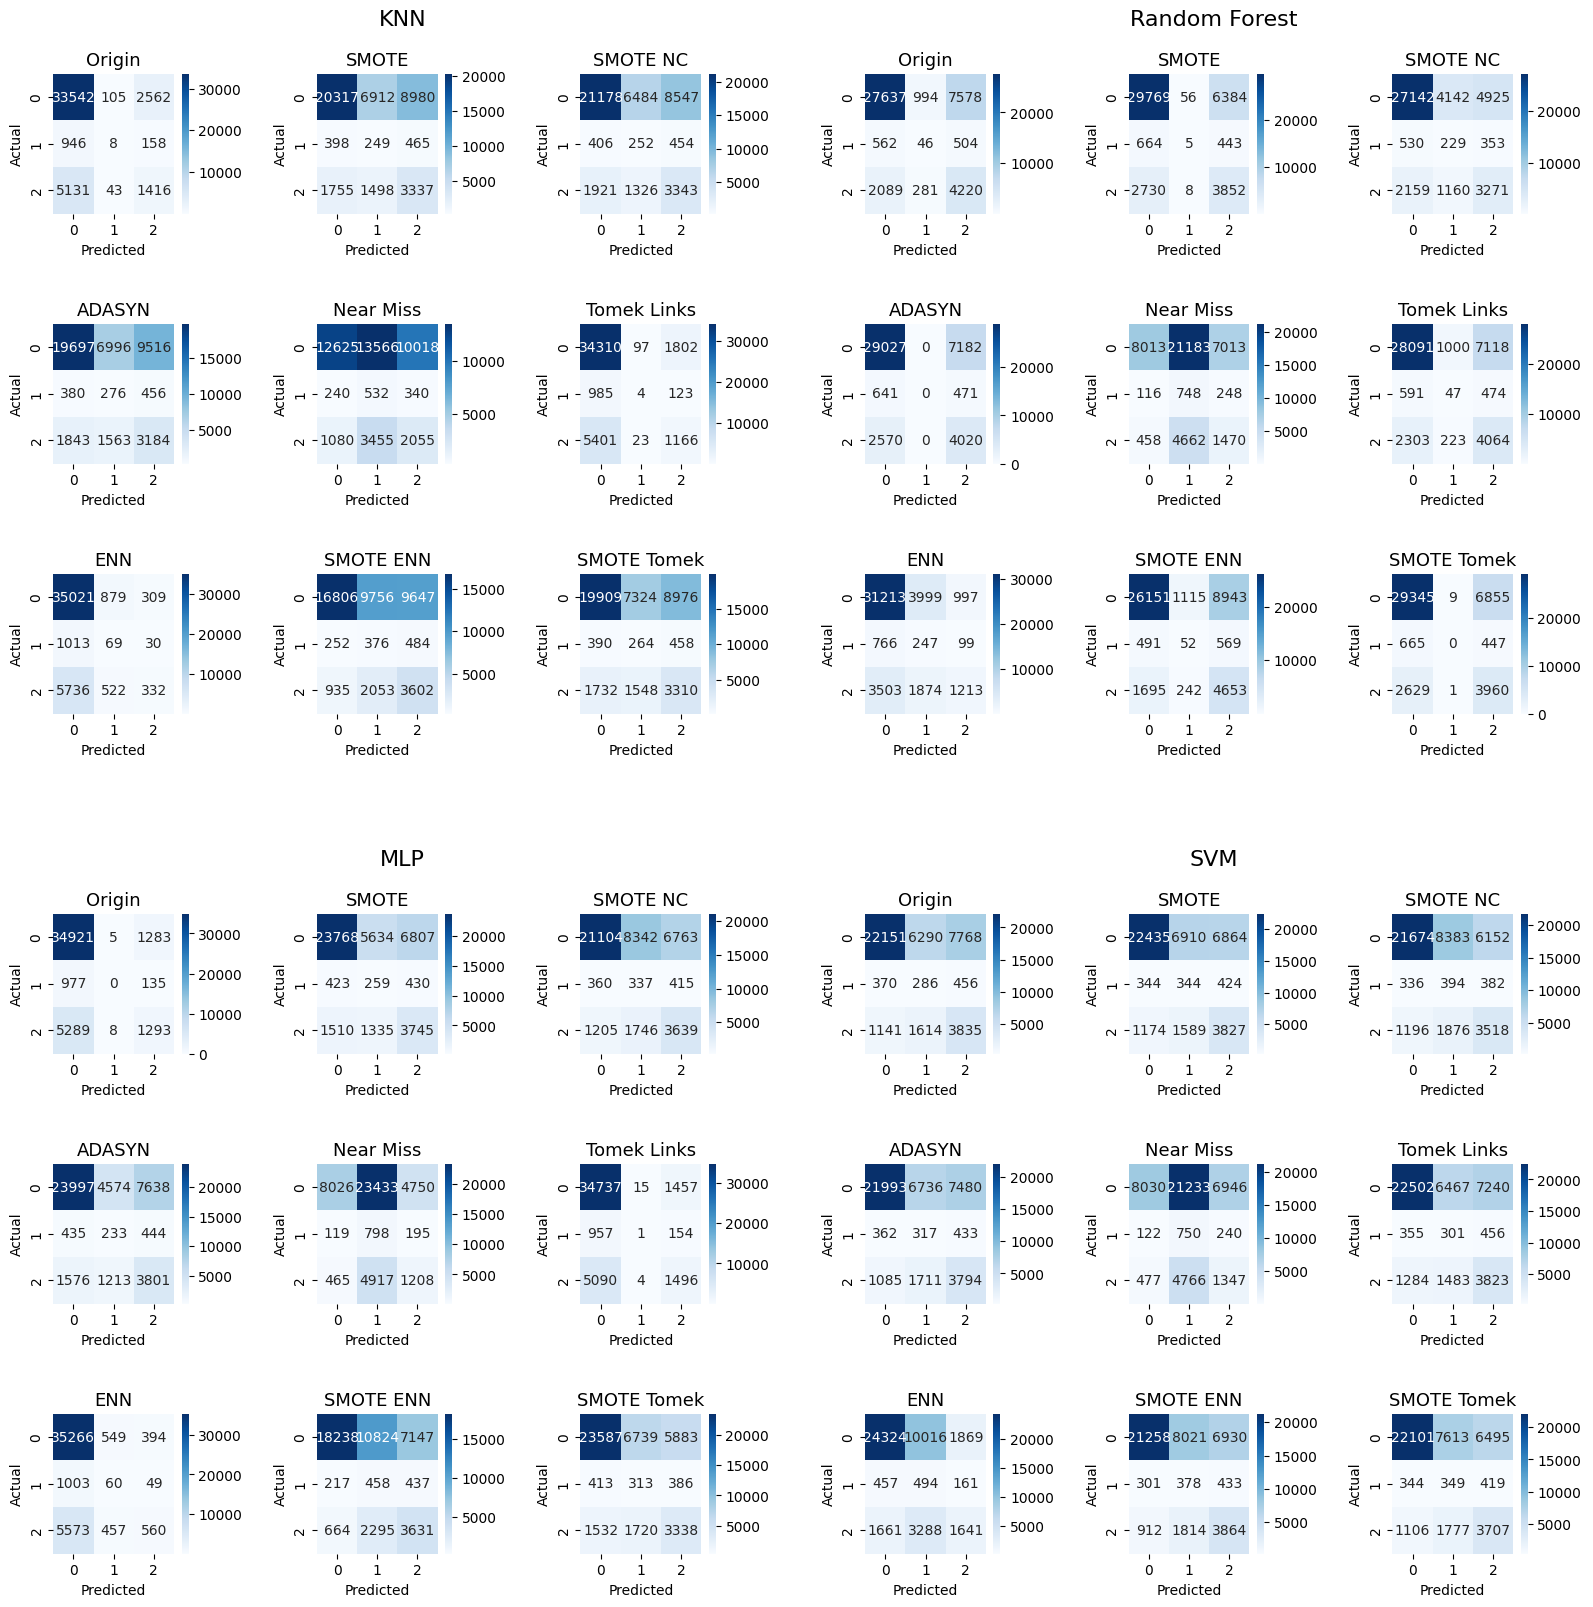

In [9]:
models = cm.index.get_level_values(0).drop_duplicates()
methods = cm.index.get_level_values(1).drop_duplicates()
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.2)

c2 = 0
fig = plt.figure(figsize=(20,20))
# fig.suptitle('Confusion Matrix', fontsize=10)
for model in models:
    c = 0
    gs2 = gridspec.GridSpecFromSubplotSpec(3,3,
                    subplot_spec=gs[c2], wspace=0.25, hspace=0.25)
    ax = fig.add_subplot(gs[c2])
    ax.set_title(f'{model}', fontsize=16)
    ax.axis('off')
    for method in methods:
        pos = gs2[c].get_position(fig)
        pos.x0 += 0.01
        pos.y0 += 0.01
        pos.x1 -= 0.02
        pos.y1 -= 0.02
        ax2 = plt.Subplot(fig, pos)
        # ax2 = plt.Subplot(fig, gs2[c])

        ax2.set_title(f'{method}', fontsize = 13)
        cm_ = cm[(model, method)]
        sns.heatmap(cm_, annot=True, fmt='g', cmap='Blues', ax=ax2)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')
        c += 1
        fig.add_axes(ax2)
        plt.tight_layout()
    c2 += 1
fig.show()
path = os.path.join(project_url, f'Result/d2/ConfusionMatrix.png')
# plt.savefig(path)
fig.savefig(path, bbox_inches='tight')
print(f'Saved {path}.')

In [10]:
# time_list = time_list.reset_index()

In [11]:
times = pd.DataFrame(time_list)
times.index = pd.MultiIndex.from_tuples(times['Method'].apply(lambda x: (x.split(' - ')[1], x.split(' - ')[0])))
times = times.drop('Method', axis=1)
times.index.names = ['Model', 'Method']
times

Time
Model         Method              
KNN           Origin         28.48
              SMOTE          31.67
              SMOTE NC       31.67
              ADASYN         30.98
              Near Miss       4.45
              Tomek Links    13.20
              ENN             9.55
              SMOTE ENN      26.74
              SMOTE Tomek    31.30
Random Forest Origin          4.37
              SMOTE          28.32
              SMOTE NC       16.46
              ADASYN         26.26
              Near Miss       1.15
              Tomek Links     3.88
              ENN             3.23
              SMOTE ENN      22.98
              SMOTE Tomek    26.30
MLP           Origin         29.91
              SMOTE          83.31
              SMOTE NC       85.63
              ADASYN         87.19
              Near Miss       1.98
              Tomek Links    28.17
              ENN            17.08
              SMOTE ENN      63.36
              SMOTE Tomek    83.97
SVM           Origin        268.32
              SMOTE        1343.05
              SMOTE NC     1250.99
              ADASYN       1717.86
              Near Miss       7.97
              Tomek Links   211.37
              ENN            68.28
              SMOTE ENN     762.99
              SMOTE Tomek  1515.32

In [12]:
times.pivot_table(index='Method', columns='Model', values='Time', sort=False).\
    to_csv(os.path.join(project_url, 'Result/d2/Times.csv'))